# Piedestały

Plik zawiera analizę wartości piedestałów z danych kalibracyjnych.

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
data_files = glob.glob("../Tell1CalibCsv/*.csv")

In [7]:
def module_names():
    names = []
    data = pd.read_csv(data_files[0] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    names = data[1]
    return names

In [8]:
def join_pedestal_data():
    joined_data = pd.DataFrame()
    for file in data_files:
        data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
        data = data[data[0].str.contains("pedestal")]
        joined_data = pd.concat([joined_data, data.loc[:, 2:2049]], axis=1)
        #joined_data = joined_data.append(data.loc[:, 2:2049], ignore_index=True)
    
    joined_data.index = module_names()
    joined_data.columns = range(90112)
    return joined_data

joined_pedestal_data_by_module = join_pedestal_data()
#print(joined_pedestal_data_by_module)

# Pierwsza kalibracja

- Wyświetlono, jak rozkładały się wartości piedestałów dla pierwszej kalibracji,
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na kanały.
  Zauważono, że większość danych jest w grupie. Niektóre, po prawej stronie, jednak zdecydowanie odstają.
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na moduły.
  Nie zauważono odstających elementów. Elementy wyglądają jak losowo rozrzucone.

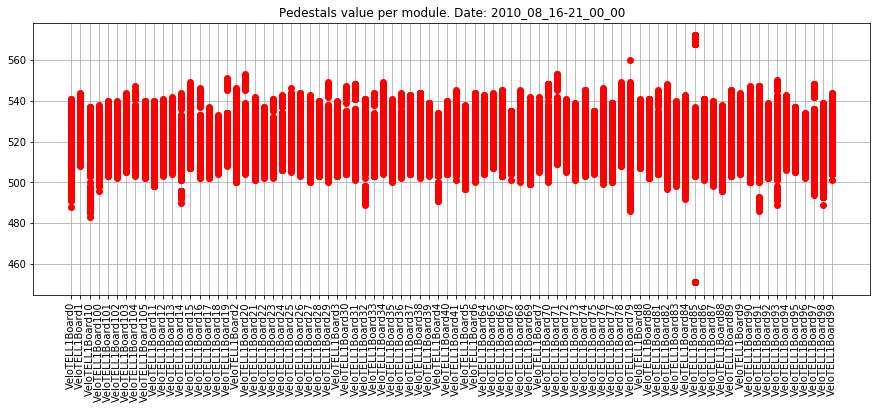

In [11]:
data2 = pd.DataFrame()
data = pd.read_csv(data_files[0] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
data = data[data[0].str.contains("pedestal")]
data2 = data.loc[:, 2:2049]

data2.index = module_names()
data2.columns = range(2048)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module. Date: 2010_08_16-21_00_00')
    
for i in range(len(data2.columns)):
    ax.plot(data2.index, data2[i], 'ro')
    
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

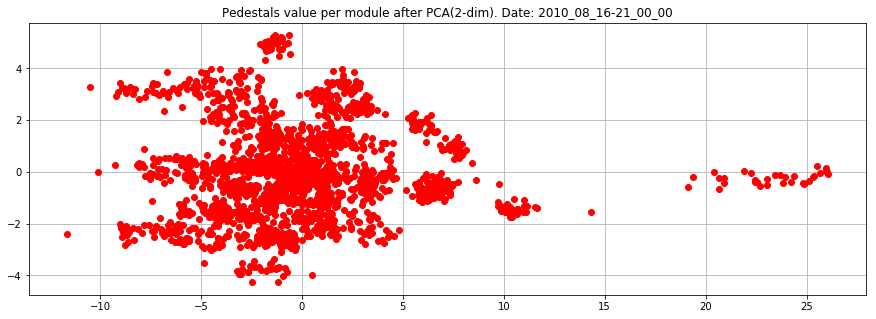

In [12]:
data_PCA = data2.T

x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim). Date: 2010_08_16-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

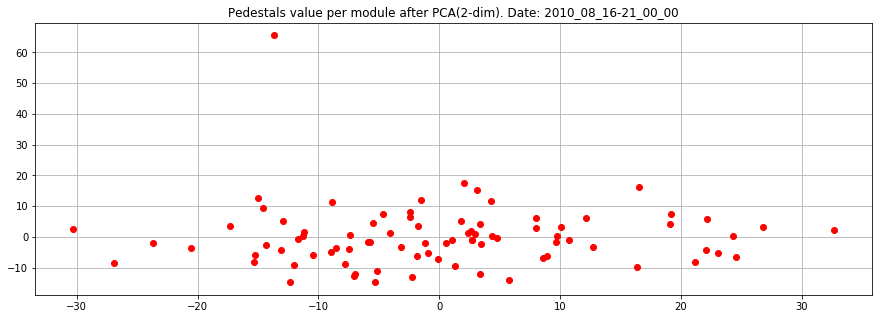

In [13]:
data_PCA = data2

x = data_PCA.loc[:, range(2048)].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim). Date: 2010_08_16-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

# Druga kalibracja

Zbadano również drugą kalibrację:
- Wyświetlono, jak rozkładały się wartości piedestałów dla drugiej kalibracji,
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na kanały.
  Zauważono, że niektóre elementy odstają analogicznie jak w pierwszej kalibracji.
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na moduły.
  Nie zauważono odstających elementów. Elementy wyglądają jak losowo rozrzucone. Analogicznie jak w pierwszej kalibracji.

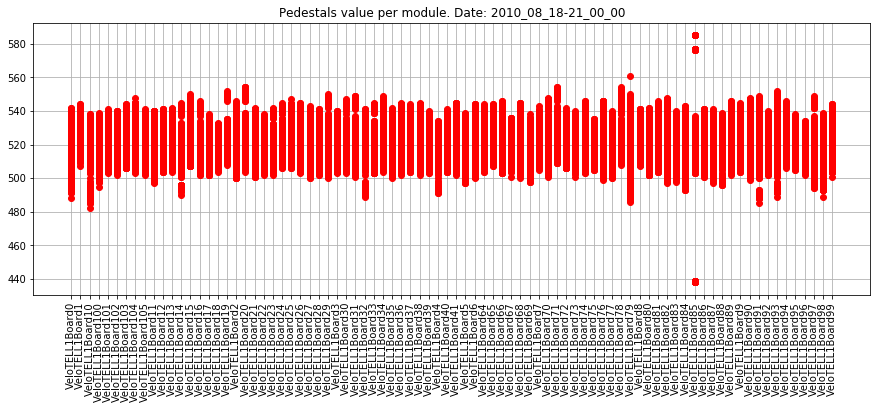

In [14]:
data2 = pd.DataFrame()
data = pd.read_csv(data_files[1] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
data = data[data[0].str.contains("pedestal")]
data2 = data.loc[:, 2:2049]

data2.index = module_names()
data2.columns = range(2048)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module. Date: 2010_08_18-21_00_00')
    
for i in range(len(data2.columns)):
    ax.plot(data2.index, data2[i], 'ro')
    
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

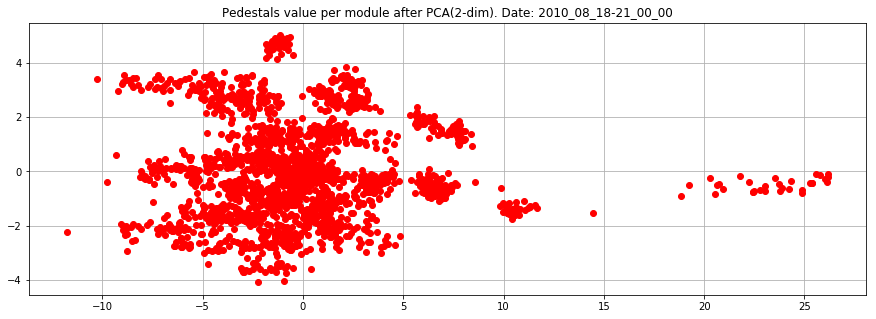

In [15]:
data_PCA = data2.T

x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim). Date: 2010_08_18-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

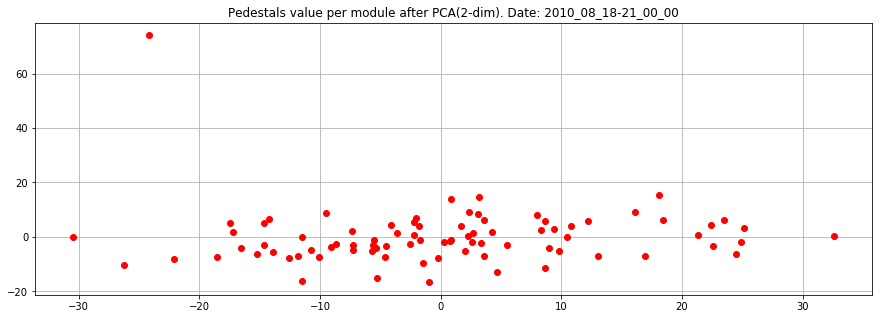

In [16]:
data_PCA = data2

x = data_PCA.loc[:, range(2048)].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim). Date: 2010_08_18-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

# Cała kalibracja

Złączono wszystkie dane kalibracyjne (piedestały) w jedną bazę danych i przeanalizowano:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na kanały.
  Dla wszystkich danych również niektóre elementy odstają. W dalszej części zbadane zostanie co to za elementy.
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na moduły.
  Dla wszystkich danych dalej losowość.

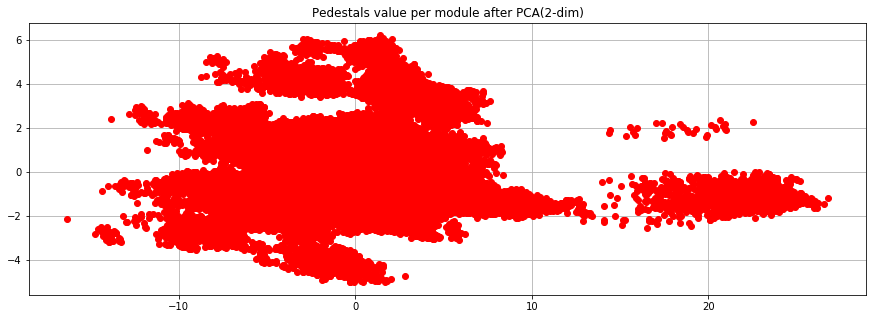

In [17]:
data_PCA = joined_pedestal_data_by_module.T

x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim)')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

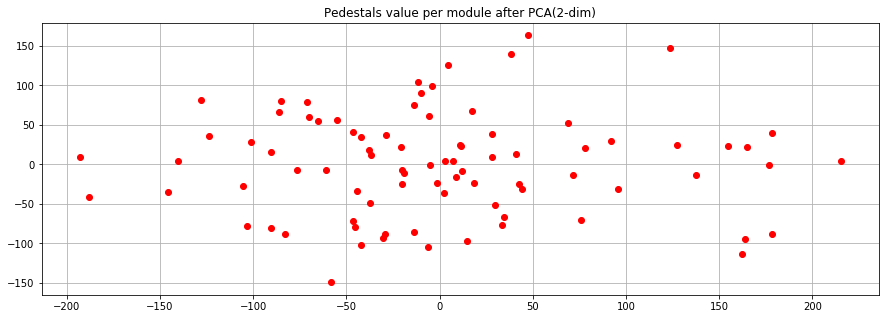

In [18]:
data_PCA = joined_pedestal_data_by_module

x = data_PCA.loc[:, range(90112)].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim)')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

# Analiza odstających danych dla trzeciej kalibracji

Sprawdzono, które z kanałów są elementami odstającymi:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na kanały.
- wyświetlono te kanały, które odstają od reszty.
  

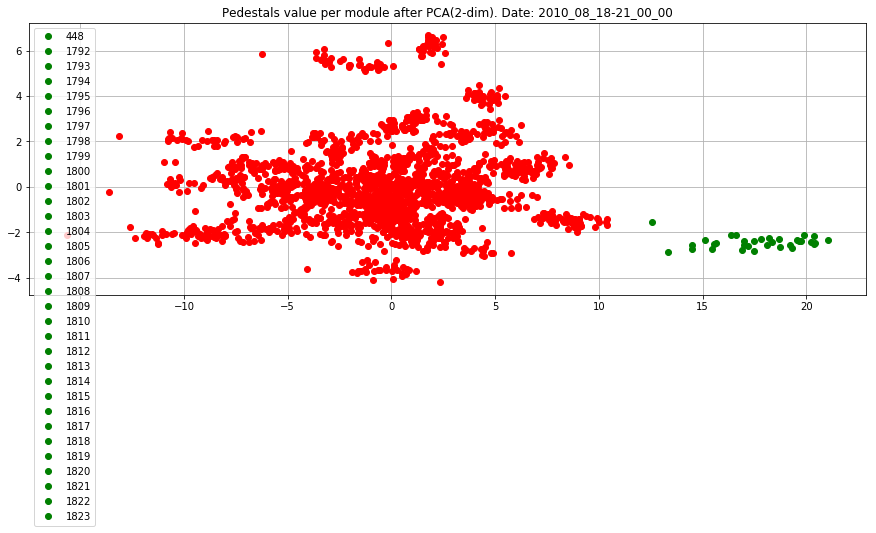

In [19]:
data2 = pd.DataFrame()
data = pd.read_csv(data_files[2] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
data = data[data[0].str.contains("pedestal")]
data2 = data.loc[:, 2:2049]

data2.index = module_names()
data2.columns = range(2048)

data_PCA = data2.T

x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim). Date: 2010_08_18-21_00_00')

for i in principalDf.index:
    if principalDf['pc1'][i] > 12:
        ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'go', label=i)
    else:
        ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'ro')
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
ax.legend()
plt.show()


# Analiza odstających danych dla wszystkich kalibracji

Dla każdej kalibracji oddzielnie sprawdzono, które z kanałów są elementami odstającymi:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na kanały.
- zbierano informacje, które z kanałów są w danej kalibracji odstającymi.

Zauważono, że te same numery kanałów są elementami odstającymi. Zliczając ilość wystąpień numerów kanałów, prawie wszystkie z nich są elementami odstającymi w każdej kalibracji (ilość wystąpień = 44). Wyjątkiem jest kanał 448, który występuje tylko 3 razy. Zebrane ilości kanałów wyświetlono pod wykresem.

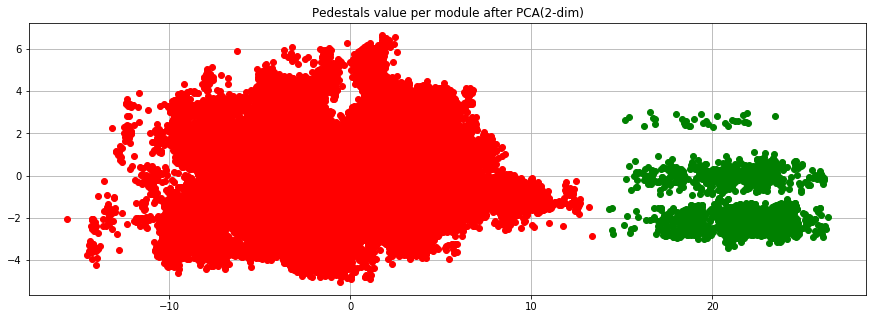

In [20]:
fig, ax = plt.subplots()
sensor_numbers = []
for file in data_files:
    #print(file)
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_PCA = data2.T

    x = data_PCA.loc[:, module_names()].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Pedestals value per module after PCA(2-dim)')

    for i in principalDf.index:
        if principalDf['pc1'][i] > 13.5:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'go')
            sensor_numbers.append(i)
        else:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'ro')
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()
#print(sensor_numbers)

In [32]:
print("[channel number, amount]")
for x in set(sensor_numbers):
    print("[{:>14}, {:>6}]".format(x, sensor_numbers.count(x)))
#print([[x,sensor_numbers.count(x)] for x in set(sensor_numbers)])

[channel number, amount]
[          1792,     43]
[          1793,     44]
[          1794,     44]
[          1795,     44]
[          1796,     44]
[          1797,     44]
[          1798,     44]
[          1799,     44]
[          1800,     44]
[          1801,     44]
[          1802,     44]
[          1803,     44]
[          1804,     44]
[          1805,     44]
[          1806,     44]
[          1807,     44]
[          1808,     44]
[          1809,     44]
[          1810,     44]
[          1811,     44]
[          1812,     44]
[          1813,     44]
[          1814,     44]
[          1815,     44]
[          1816,     44]
[          1817,     44]
[          1818,     44]
[          1819,     44]
[          1820,     44]
[          1821,     44]
[          1822,     44]
[          1823,     44]
[           448,      3]


# Analiza danych dla wszystkich kalibracji w zależności od modułu

Dla każdej kalibracji oddzielnie sprawdzono, jak rozkładają się dane:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na moduły.

Tylko nieliczne elementy odstają od grupy, reszta zawiera się w jednej grupie.

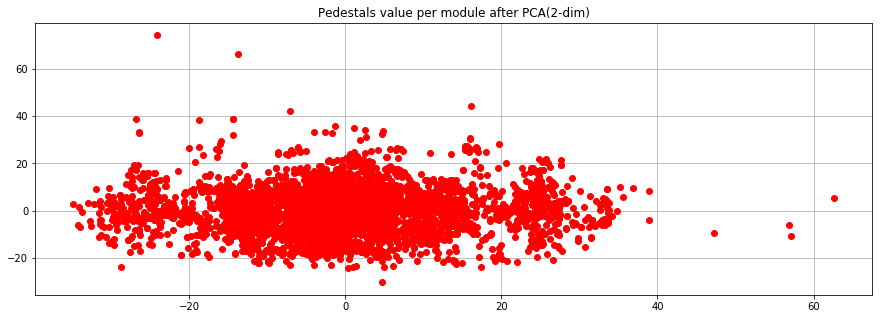

In [21]:
fig, ax = plt.subplots()
for file in data_files:
    #print(file)
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_PCA = data2

    x = data_PCA.loc[:, range(2048)].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Pedestals value per module after PCA(2-dim)')

    for i in principalDf.index:
        ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'ro')
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()
#print(sensor_numbers)